In [59]:
import pandas as pd
import matplotlib.pyplot as plt

def parse_file_to_dataframe(file_path):
    # Read the file content
    with open(file_path, 'r') as file:
        lines = file.read().strip().split('\n')

    # Split the content into sections based on empty lines
    sections = [[]]
    for line in lines:
        if line.strip():  # If the line is not empty, add it to the current section
            sections[-1].append(line)
        else:  # Start a new section if the line is empty
            sections.append([])

    # Prepare for parsing into DataFrame
    dfs = []  # List to hold DataFrames for each section
    for section_index, section in enumerate(sections):
        # Ensure section is not empty and does not start with "Warning" or "CPU Usage"
        if section and not section[0].startswith(("Warning", "CPU Usage")):
            # Extract headers and data, skipping non-data lines
            headers = section[0].split()
            data = [line.split() for line in section[1:] if not line.startswith(("Warning", "CPU Usage"))]
            df_section = pd.DataFrame(data, columns=headers)
            # Convert numeric columns to float, excluding the first column assumed to be non-numeric
            for column in headers[1:]:
                df_section[column] = pd.to_numeric(df_section[column], errors='coerce')
            # Add a column for the run index
            df_section['run_index'] = section_index + 1
            # Append to the list of DataFrames
            dfs.append(df_section)

    # Concatenate all section DataFrames into one
    return pd.concat(dfs, ignore_index=True)

In [60]:
filenames = ['no_interference.txt', 'ibench-cpu.txt', 'ibench-l1d.txt', 'ibench-l1i.txt']

In [39]:
results_dfs = {}
for filename in filenames:
    file_path = f'results/{filename}'
    results_dfs[filename.split(".")[0]] = parse_file_to_dataframe(file_path)

In [64]:
df = results_dfs['no_interference']
df

,#type,avg,std,min,p5,p10,p50,p67,p75,p80,p85,p90,p95,p99,p999,p9999,QPS,target,run_index
0,read,409.7,280.0,173.5,257.5,282.6,396.9,431.8,450.9,463.7,479.6,501.5,537.7,630.2,4216.2,8973.8,4956.0,5000,1
1,read,465.2,388.4,173.5,244.1,265.2,450.3,517.0,549.7,573.5,598.5,630.9,681.2,834.6,5429.7,19222.1,10067.2,10000,1
2,read,499.4,314.9,160.7,240.1,263.8,475.2,570.0,617.2,649.2,689.5,740.7,812.2,990.0,4377.2,10458.6,14997.4,15000,1
3,read,534.5,415.5,160.7,239.4,264.2,496.4,595.3,653.2,700.3,759.1,827.9,924.8,1157.2,4532.8,12901.7,20029.6,20000,1
4,read,553.2,333.2,160.7,242.3,266.2,507.2,618.4,687.2,744.6,812.2,898.4,1016.7,1284.4,3166.8,10672.9,24928.4,25000,1
5,read,583.1,392.7,160.7,246.3,272.1,552.6,661.4,726.5,777.3,840.2,917.5,1023.4,1265.3,4152.5,10904.6,30056.0,30000,1
6,read,592.9,358.7,160.7,248.6,276.7,558.7,675.1,742.6,794.7,857.6,935.2,1050.7,1306.8,3960.2,13282.1,35037.2,35000,1
7,read,597.6,373.8,160.7,250.3,281.1,560.3,680.3,750.7,801.4,862.9,941.3,1064.7,1327.9,3541.8,13918.8,40234.4,40000,1
8,read,626.4,385.0,160.7,259.8,295.0,584.2,713.8,785.4,838.2,900.4,980.2,1099.0,1403.4,4278.4,14368.8,44974.0,45000,1
9,read,634.9,403.5,173.5,270.6,310.7,582.4,711.3,788.3,847.8,917.9,1005.1,1140.0,1432.0,3377.1,15675.8,49863.6,50000,1


In [65]:
means = df.groupby('target').agg({'QPS': 'mean', 'p95': 'mean'}).sort_values('QPS', ascending=False)
errs = df.groupby('target').agg({'QPS': 'std', 'p95': 'std'}).sort_values('QPS', ascending=False)

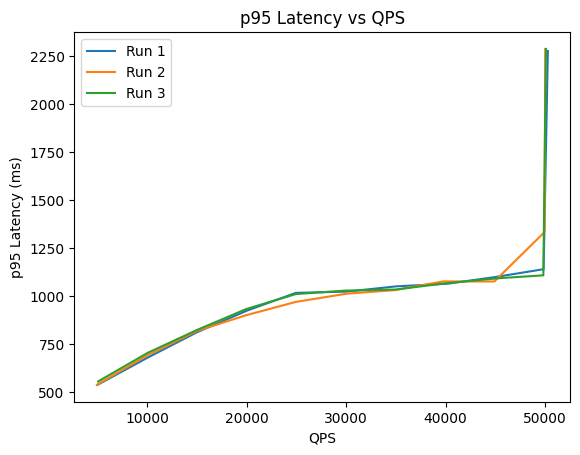

In [44]:
fig = plt.figure()
df = results_dfs["no_interference"]
for run_index in df['run_index'].unique():
    df_run = df[df['run_index'] == run_index]
    plt.errorbar(df_run['QPS'], df_run['p95'], label=f'Run {run_index}')
plt.legend()
plt.title('p95 Latency vs QPS')
plt.xlabel('QPS')
plt.ylabel('p95 Latency (ms)')
plt.show()